## Analysis of Absenteeism at work

### Awadh Ahmed

###### Goals:
* Using KNN  to predict absenteeism at work places. 
* Using Perceptron & SVM to predict social drinking status

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Data Preprocessing

###### Procedure mainly includes handling missing values, Labeling data appropriately and data munging

In [418]:
# Replacing spaces in column names with _
# Spaces between words dont tend to play nice with Python
# To play it safe, we get rid of them

df = pd.read_csv("Absenteeism_at_work.csv", encoding= 'unicode_escape')
df.columns = df.columns.str.replace(' ', '_')
df.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [419]:
# Having a look at the data types of our columns and checking for null values
# Work_load's dtype seems to be an object, we fix this in the next cell

display(df.dtypes)
display(df.isna().any())

ID                                  int64
Reason_for_absence                  int64
Month_of_absence                    int64
Day_of_the_week                     int64
Seasons                             int64
Transportation_expense              int64
Distance_from_Residence_to_Work     int64
Service_time                        int64
Age                                 int64
Work_load_Average/day_             object
Hit_target                          int64
Disciplinary_failure                int64
Education                           int64
Son                                 int64
Social_drinker                      int64
Social_smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body_mass_index                     int64
Absenteeism_time_in_hours           int64
dtype: object

ID                                 False
Reason_for_absence                 False
Month_of_absence                   False
Day_of_the_week                    False
Seasons                            False
Transportation_expense             False
Distance_from_Residence_to_Work    False
Service_time                       False
Age                                False
Work_load_Average/day_             False
Hit_target                         False
Disciplinary_failure               False
Education                          False
Son                                False
Social_drinker                     False
Social_smoker                      False
Pet                                False
Weight                             False
Height                             False
Body_mass_index                    False
Absenteeism_time_in_hours          False
dtype: bool

In [420]:
# Here we remove the , in the data and convert it from an object to a float data type

df['Work_load_Average/day_']=df['Work_load_Average/day_'].str.replace(',','').astype(float)
df['Work_load_Average/day_'].dtype

dtype('float64')

In [421]:
# Next we transform our columns appropriately
# Columns with Binary datay (0s and 1s) are converted into Boolean type
# Categorical columns are converted into category types

df['Social_drinker'] = df['Social_drinker'].astype('bool')
df['Social_smoker'] = df['Social_smoker'].astype('bool')
df['Disciplinary_failure'] = df['Disciplinary_failure'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Day_of_the_week'] = df['Day_of_the_week'].astype('category')
df['Month_of_absence'] = df['Month_of_absence'].astype('category')
df['Reason_for_absence'] = df['Reason_for_absence'].astype('category')

In [422]:
# Quick Sanity check

display(df.dtypes)

ID                                    int64
Reason_for_absence                 category
Month_of_absence                   category
Day_of_the_week                    category
Seasons                            category
Transportation_expense                int64
Distance_from_Residence_to_Work       int64
Service_time                          int64
Age                                   int64
Work_load_Average/day_              float64
Hit_target                            int64
Disciplinary_failure               category
Education                          category
Son                                   int64
Social_drinker                         bool
Social_smoker                          bool
Pet                                   int64
Weight                                int64
Height                                int64
Body_mass_index                       int64
Absenteeism_time_in_hours             int64
dtype: object

In [423]:
# Here we notice that Month_of_absence has 13 unique values instead of the expected 12

print(len(df['Month_of_absence'].unique()))

df[df['Month_of_absence'] == 0]

13


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
737,4,0,0,3,1,118,14,13,40,271219.0,...,0,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219.0,...,0,1,2,True,False,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219.0,...,0,1,1,False,False,1,77,175,25,0


In [424]:
# Getting rid of Month 0 
# We have also gotten rid of data where absenteeism hours are 0
# While there are methods to impute the data, for the sake of efficiency we are getting rid of them

df = df[df['Month_of_absence'] != 0] 
df = df[df['Absenteeism_time_in_hours'] != 0]
len(df)

696

## 2. EDA

###### Some simple visualizations and exploratory data analysis using seaborn

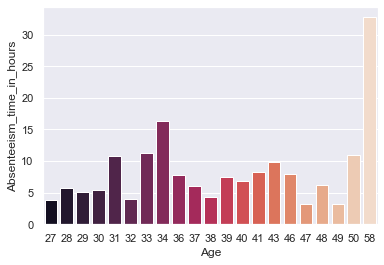

In [425]:
# From the graph we see that employees at the 58 years old range tend to have a higher absenteeism rate

absByAge = df.groupby('Age')[['Absenteeism_time_in_hours']].mean()

absByAge.reset_index(inplace=True)

sns.barplot(x = 'Age', y = 'Absenteeism_time_in_hours',data = absByAge, palette="rocket")

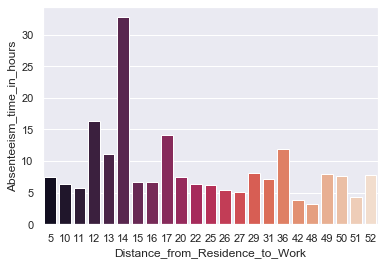

In [549]:
# If there was a correlation between absenteeism and distance the plot would be skewed to the left
# Since that doesn't occur, its safe to say that there is no real correlation

absByDistance = df.groupby('Distance_from_Residence_to_Work')[['Absenteeism_time_in_hours']].mean()

absByDistance.reset_index(inplace=True)

sns.barplot(x = 'Distance_from_Residence_to_Work', y = 'Absenteeism_time_in_hours',data = absByDistance, 
            palette="rocket")

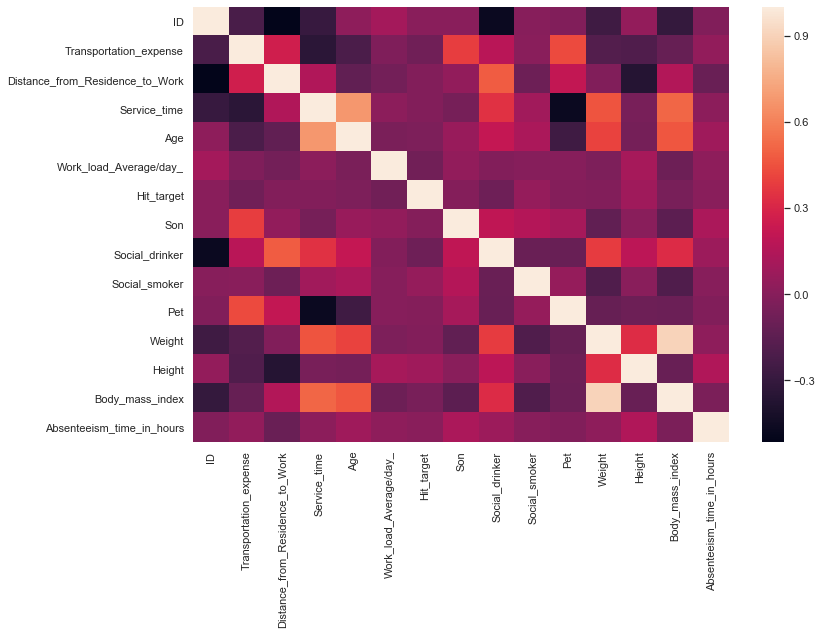

In [427]:
# Plotting a heatmap of our correlation matrix
# Notice that no variable has significant correlation with Absenteeism
# Hence we will be keeping all our variables for our model

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df.corr(), ax=ax)
plt.show()

## 3. Creating our KNN model

In [428]:
# Creating our train test split for our data (70/30)

from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:20].values
y = df.iloc[:, 20].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [429]:
# Here we create a loop for our KNN model
# The loop is meant to check the effect of different k neighbors values on our model

from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 9)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

Text(0.5, 0, 'n_neighbors')

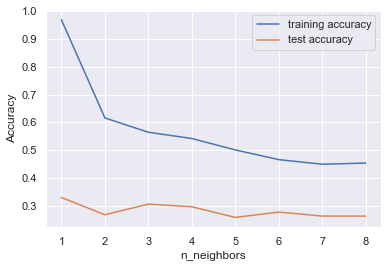

In [430]:
# Plotting the accuracy of our model
# Note that our test accuracy is quite low with a maxmimum accuracy being 0.33 at k = 1

sns.lineplot(x = neighbors_settings, y = training_accuracy, label="training accuracy")
sns.lineplot(x = neighbors_settings, y = test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

In [550]:
# Next we try to optimize our knn model
# To this extent, we create ranges for absenteeism
# Rather than predicting specific values, we try to predict ranges

absenteeismBins = [0, 4, 8, 12, 16, np.inf]
absenteeismRange =  ['<4', '4-8', '8-12','12-16', '16+']
df['Absenteeism_Range'] = pd.cut(df['Absenteeism_time_in_hours'], absenteeismBins, labels=absenteeismRange)

df.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Absenteeism_Range
0,11,26,7,3,1,289,36,13,33,239554.0,...,1,2,True,False,1,90,172,30,4,<4
2,3,23,7,4,1,179,51,18,38,239554.0,...,1,0,True,False,0,89,170,31,2,<4
3,7,7,7,5,1,279,5,14,39,239554.0,...,1,2,True,True,0,68,168,24,4,<4
4,11,23,7,5,1,289,36,13,33,239554.0,...,1,2,True,False,1,90,172,30,2,<4
5,3,23,7,6,1,179,51,18,38,239554.0,...,1,0,True,False,0,89,170,31,2,<4


In [432]:
# New train, test split using asenteeism range as our target

y = df['Absenteeism_Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [433]:
# New loop for our KNN model

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 9)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

Text(0.5, 0, 'n_neighbors')

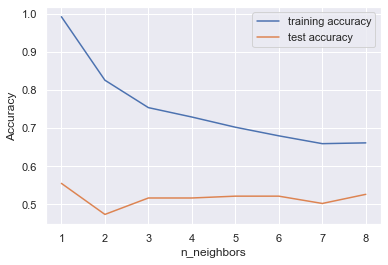

In [434]:
sns.lineplot(x = neighbors_settings, y = training_accuracy, label="training accuracy")
sns.lineplot(x = neighbors_settings, y = test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

#### Conclusion:

We notice that using the engineered bins improves the accuracy of our KNN model giving us an accuracy of 0.55 at k neigbors = 1 <br>
Accuracy reducing with higher k values makes sense given the fact that our dataset is quite small.

## Using Perceptron & SVM to predict social drinking status

Predicting wether employees drink or not depending on various factors

In [539]:
# For our predictors we have used Age, Education, Son, Service Time
# While there are more sophisticated methods of finding feature selection, we've used a trial and error method
# Mainly given the fact that we're working a limited number of columns

X = df[['Age',
       'Education',
       'Son',
       'Service_time']]

y = df['Social_drinker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

In [540]:
# Using the perceptron model from scklearn's linear_model library

from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [541]:
# Our model gives us an accuracy of 0.81 at predicting wether an employee drinks socially or not

from sklearn.metrics import accuracy_score

y_pred = perceptron.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.81


In [545]:
# Next, we use the SVM model

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [546]:
# According to our conusion matrix, the accuracy of our model is 0.81 as well.

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[75 25]
 [14 95]]
              precision    recall  f1-score   support

       False       0.84      0.75      0.79       100
        True       0.79      0.87      0.83       109

    accuracy                           0.81       209
   macro avg       0.82      0.81      0.81       209
weighted avg       0.82      0.81      0.81       209

